# EPS 109 Final Project: Modeling Traffic with Ordinary Differential Equations
Siddhant Sharma

In [ ]:
# Uncomment when running animations
# %matplotlib osx 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
from matplotlib.animation import FFMpegWriter

## Ordinary Differential Equation Model

The ODE model that each car follows is 

In [3]:
def ode_generator(velocity_fn):
    def ode(t, y):
        global n, length
        r = y[0:n]
        v = y[n:2*n]

        drdt = v
        dvdt = np.zeros(n)
        for i in range(n-1):
            dvdt[i] = velocity_fn(r[i+1] - r[i]) - v[i]
        # Need first car to keep moving
        rand_velo = np.random.randn(1)[0] + 2
        dvdt[n-1] = velocity_fn(rand_velo) - v[n-1] * 0.5
        
        return np.concatenate((drdt, dvdt))
    return ode

This approach has a few basic assumptions. The velocity function `velocity_fn` must be bounded by $(-\infty, +\infty)$, otherwise the cars may go infinitely fast. Another assumption is that the first car (car `n`) moves at a constant pace. This is an assumption that can be modified in future work, but was decided upon in this case to simplify modeling. To achieve this, the first car uses a normal distribution with standard variance but scaled to a mean of 2, as an estimate of how many meters forward it has moved.  

Since this is a single lane, each car's velocity depends on the distance between itself and the car in front. This is encompassed within the model.

## Define velocity functions  
As discussed above, the velocity functions must be bounded. Therefore, two choices for velocity functions are $\tanh$ and sigmoid. The functions are defined and graphed below.np.random.randn(1

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) - 0.5

def tanh(x):
    return np.tanh(x)

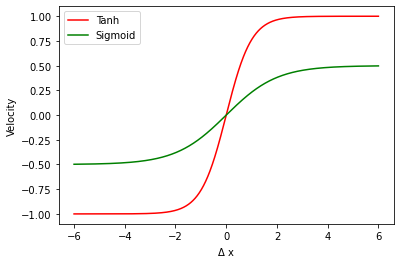

In [5]:
xRange = np.linspace(-6, 6, num=1000)

plt.plot(xRange, tanh(xRange), 'r-', label="Tanh")
plt.plot(xRange, sigmoid(xRange), 'g-', label="Sigmoid")
plt.legend()
plt.ylabel("Velocity")
plt.xlabel(r"$\Delta$ x")
plt.show()

As we can see, both functions are very similar, as they are centered about the origin and have a very similar shape. However, sigmoid is a much smoother function, so cars will accelerate slower compared to tanh.

## Define basic constants for all simulations

In [6]:
tMax = 250
dt = 0.5

In [7]:
def initialize():
    r0 = np.arange(0, n, 1) * spacing + (np.random.randn(n) * 0.5)
    v0 = np.zeros(n)
    y = np.concatenate((r0, v0))
    return y

## Scenario 1: Track length of 100 meters with 50 cars

In [8]:
n = 50
L = 100
spacing = n / L

### Tanh Velocity

In [9]:
y = initialize()

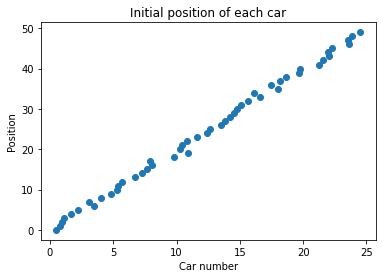

In [10]:
plt.clf()
plt.scatter(y[:n], np.arange(0, n, 1))
plt.xlabel("Car number")
plt.ylabel("Position")
plt.title("Initial position of each car")
plt.show()

In [11]:
tanh_ode = ode_generator(tanh)
tanh_sol = solve_ivp(tanh_ode, [0, tMax], y, method="RK45", max_step=dt)

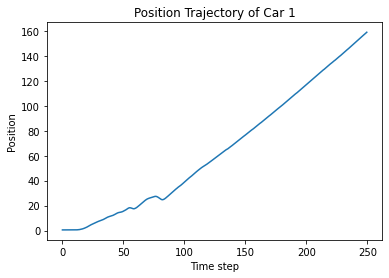

In [12]:
times = np.arange(0, tMax, dt)
plt.plot(times, tanh_sol.y[0, :500])
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("Position Trajectory of Car 1")
plt.show()

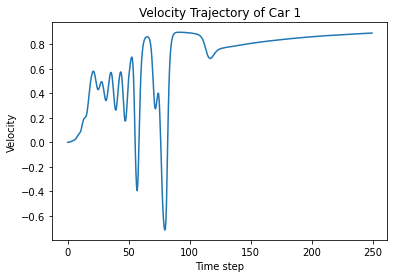

In [13]:
plt.plot(times, tanh_sol.y[n, :500])
plt.xlabel("Time step")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Car 1")
plt.show()

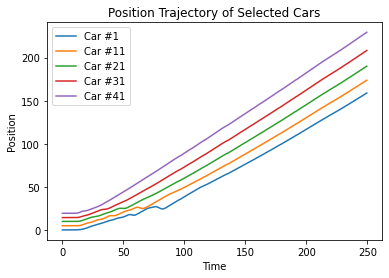

In [14]:
for i in range(n):
    if i % 10 == 0:
        plt.plot(times, tanh_sol.y[i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Trajectory of Selected Cars")
plt.show()

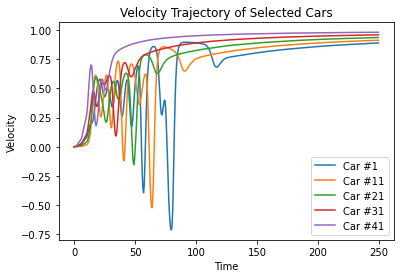

In [15]:
for i in range(n):
    if i % 10 == 0:
        plt.plot(times, tanh_sol.y[n+i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Selected Cars")
plt.show()

We can see that with this initial parameter setup, there is instability in the system. The cars velocity is adjusting between braking and speeding up until about timestep 100, after which the cars settle into a stable state. We can also see how this propagates from the first cars (car 41) to later cars in the system.

### Sigmoid velocity

In [16]:
y = initialize()

In [17]:
sigmoid_ode = ode_generator(sigmoid)
sigmoid_sol = solve_ivp(sigmoid_ode, [0, tMax], y, method="RK45", max_step=dt)

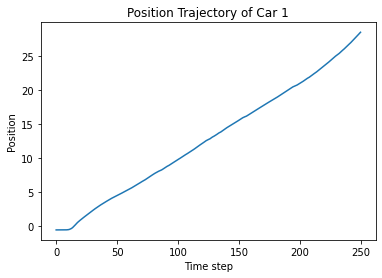

In [18]:
times = np.arange(0, tMax, dt)
plt.plot(times, sigmoid_sol.y[0, :500])
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("Position Trajectory of Car 1")
plt.show()

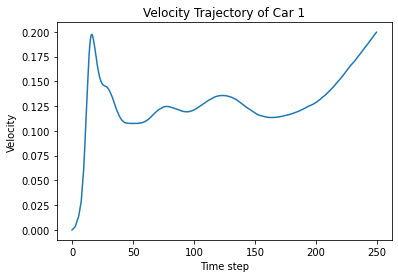

In [19]:
plt.plot(times, sigmoid_sol.y[n, :500])
plt.xlabel("Time step")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Car 1")
plt.show()

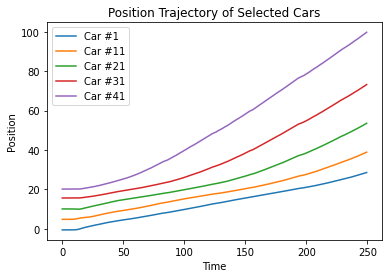

In [20]:
for i in range(n):
    if i % 10 == 0:
        plt.plot(times, sigmoid_sol.y[i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Trajectory of Selected Cars")
plt.show()

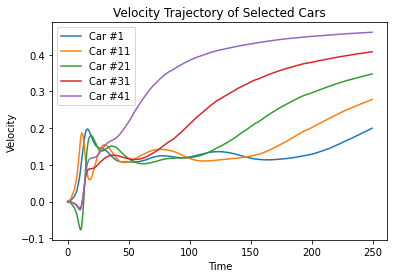

In [21]:
for i in range(n):
    if i % 10 == 0:
        plt.plot(times, sigmoid_sol.y[n+i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Selected Cars")
plt.show()

We can also see that with this initial parameter setup, there is instability in the system, but it is much smoother than the `tanh` simulation. This can be attributed to the smoothness of the `sigmoid` function compared to the `tanh` function. Similar to before, we can see how stability propagates from the first cars (car 41) to later cars in the system. However, the `sigmoid` system takes longer to propagate the stability compared to `tanh`.

### Generate animations

In [ ]:
# Tanh velocity function position of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario1_tanh_car1_position', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario1_tanh_car1_position.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        # update_figure(times[:i], tanh_sol.y[0, :i], "Time", "Position", "[Scenario 1] Tanh Position of Car 1")
        plt.clf()
        plt.plot(times[:i], tanh_sol.y[0, :i])
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 1] Tanh Position of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Tanh velocity function velocity of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario1_tanh_car1_velocity', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario1_tanh_car1_velocity.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        # update_figure(times[:i], tanh_sol.y[n, :i], "Time", "Velocity", "[Scenario 1] Tanh Velocity of Car 1")
        plt.clf()
        plt.plot(times[:i], tanh_sol.y[n, :i])
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.title("[Scenario 1] Tanh Velocity of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Tanh velocity function selected cars
fig = plt.figure(dpi=200)
metadata = dict(title='scenario1_tanh_cars_positions', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario1_tanh_cars_positions.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        for j in range(n):
            if j % 10 == 0:
                plt.plot(times[:i], tanh_sol.y[j, :i], label=f"Car #{j+1}")
        # update_figure(times[:i], tanh_sol.y[n, :i], "Time", "Position", "[Scenario 1] Tanh Velocity of Car 1")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 1] Tanh Position of Selected Cars")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function position of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario1_sigmoid_car1_position', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario1_sigmoid_car1_position.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        # update_figure(times[:i], tanh_sol.y[0, :i], "Time", "Position", "[Scenario 1] Tanh Position of Car 1")
        plt.clf()
        plt.plot(times[:i], sigmoid_sol.y[0, :i])
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 1] Sigmoid Position of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function velocity of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario1_sigmoid_car1_velocity', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario1_sigmoid_car1_velocity.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        # update_figure(times[:i], tanh_sol.y[n, :i], "Time", "Velocity", "[Scenario 1] Tanh Velocity of Car 1")
        plt.clf()
        plt.plot(times[:i], sigmoid_sol.y[n, :i])
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.title("[Scenario 1] Sigmoid Velocity of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function selected cars
fig = plt.figure(dpi=200)
metadata = dict(title='scenario1_sigmoid_cars_positions', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario1_sigmoid_cars_positions.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        for j in range(n):
            if j % 10 == 0:
                plt.plot(times[:i], sigmoid_sol.y[j, :i], label=f"Car #{j+1}")
        # update_figure(times[:i], tanh_sol.y[n, :i], "Time", "Position", "[Scenario 1] Tanh Velocity of Car 1")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 1] Sigmoid Position of Selected Cars")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

## Scenario 2: Track length of 100 meters with 25 cars

In [22]:
n = 25
L = 100
spacing = n / L

### Tanh velocity

In [23]:
y = initialize()

In [24]:
tanh_ode = ode_generator(tanh)
tanh_sol = solve_ivp(tanh_ode, [0, tMax], y, method="RK45", max_step=dt)

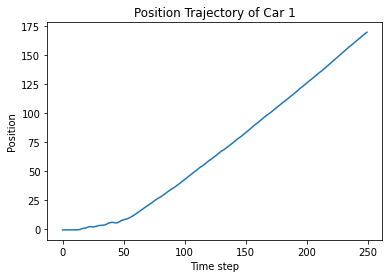

In [25]:
times = np.arange(0, tMax, dt)
plt.plot(times, tanh_sol.y[0, :500])
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("Position Trajectory of Car 1")
plt.show()

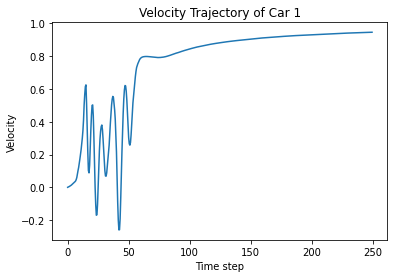

In [26]:
plt.plot(times, tanh_sol.y[n, :500])
plt.xlabel("Time step")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Car 1")
plt.show()

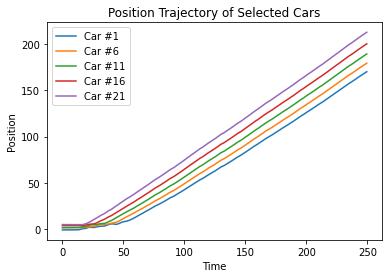

In [27]:
for i in range(n):
    if i % 5 == 0:
        plt.plot(times, tanh_sol.y[i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Trajectory of Selected Cars")
plt.show()

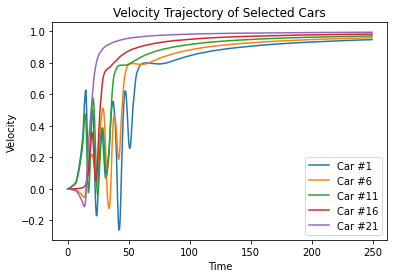

In [28]:
for i in range(n):
    if i % 5 == 0:
        plt.plot(times, tanh_sol.y[n+i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Selected Cars")
plt.show()

Compared to Scenario #1, Scenario #2 tanh velocity is much more stable in terms of the positions and velocities of the car. It is still somewhat unstable in the sense that we can see car #1 shifted into negative velocity, indicating the car needed to reverse, which is unwanted behavior. However, overall, there is much less initial instability and the cars reach their "max velocity".

### Sigmoid velocity

In [29]:
y = initialize()

In [30]:
sigmoid_ode = ode_generator(sigmoid)
sigmoid_sol = solve_ivp(sigmoid_ode, [0, tMax], y, method="RK45", max_step=dt)

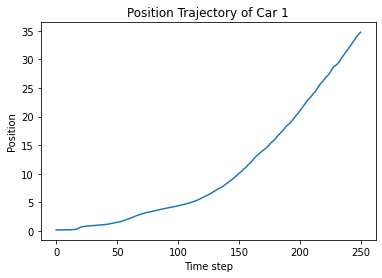

In [31]:
times = np.arange(0, tMax, dt)
plt.plot(times, sigmoid_sol.y[0, :500])
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("Position Trajectory of Car 1")
plt.show()

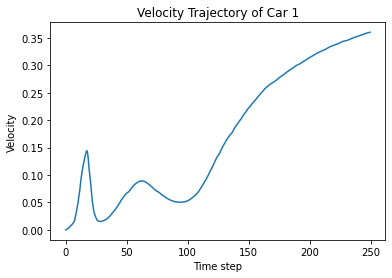

In [32]:
plt.plot(times, sigmoid_sol.y[n, :500])
plt.xlabel("Time step")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Car 1")
plt.show()

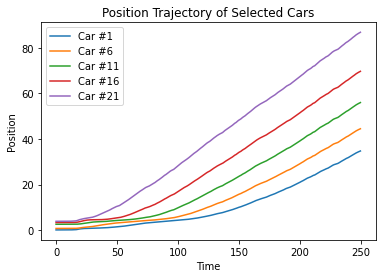

In [33]:
for i in range(n):
    if i % 5 == 0:
        plt.plot(times, sigmoid_sol.y[i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Trajectory of Selected Cars")
plt.show()

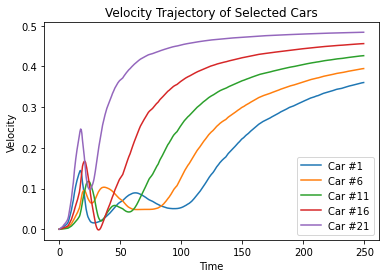

In [34]:
for i in range(n):
    if i % 5 == 0:
        plt.plot(times, sigmoid_sol.y[n+i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Selected Cars")
plt.show()

As we saw from Scenario #2 tanh, Scenario #2 sigmoid velocity is also more stable and realistic than scenario #1. No cars have negative velocity and start stably reaching their maximum velocity, which could have been reached if there was more time in the simulation. The position and velocity of car #1 are stable as expected. This can likely be attributed to the decreased density of the cars' initial positions. 

### Generate animations

In [ ]:
# Tanh velocity function position of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario2_tanh_car1_position', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario2_tanh_car1_position.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        plt.plot(times[:i], tanh_sol.y[0, :i])
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 2] Tanh Position of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Tanh velocity function velocity of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario2_tanh_car1_velocity', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario2_tanh_car1_velocity.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        # update_figure(times[:i], tanh_sol.y[n, :i], "Time", "Velocity", "[Scenario 1] Tanh Velocity of Car 1")
        plt.clf()
        plt.plot(times[:i], tanh_sol.y[n, :i])
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.title("[Scenario 2] Tanh Velocity of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Tanh velocity function selected cars
fig = plt.figure(dpi=200)
metadata = dict(title='scenario2_tanh_cars_positions', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario2_tanh_cars_positions.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        for j in range(n):
            if j % 5 == 0:
                plt.plot(times[:i], tanh_sol.y[j, :i], label=f"Car #{j+1}")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 2] Tanh Position of Selected Cars")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function position of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario2_sigmoid_car1_position', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario2_sigmoid_car1_position.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        plt.plot(times[:i], sigmoid_sol.y[0, :i])
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 2] Sigmoid Position of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function velocity of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario2_sigmoid_car1_velocity', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario2_sigmoid_car1_velocity.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        plt.plot(times[:i], sigmoid_sol.y[n, :i])
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.title("[Scenario 2] Sigmoid Velocity of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function selected cars
fig = plt.figure(dpi=200)
metadata = dict(title='scenario2_sigmoid_cars_positions', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario2_sigmoid_cars_positions.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        for j in range(n):
            if j % 5 == 0:
                plt.plot(times[:i], sigmoid_sol.y[j, :i], label=f"Car #{j+1}")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 2] Sigmoid Position of Selected Cars")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

## Scenario 3: Track Length 250 with 100 Cars

In [35]:
n = 100
L = 250
spacing = n / L

### Tanh velocity

In [36]:
y = initialize()

In [37]:
tanh_ode = ode_generator(tanh)
tanh_sol = solve_ivp(tanh_ode, [0, tMax], y, method="RK45", max_step=dt)

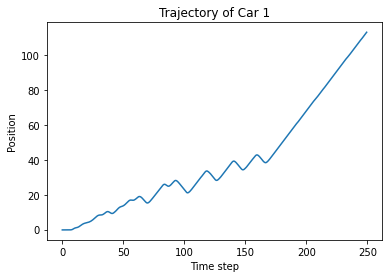

In [38]:
times = np.arange(0, tMax, dt)
plt.plot(times, tanh_sol.y[0, :500])
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("Trajectory of Car 1")
plt.show()

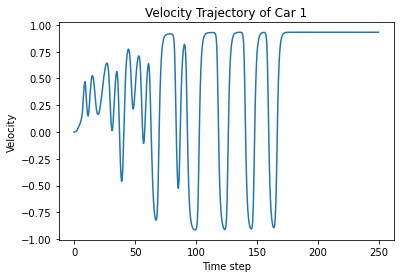

In [39]:
plt.plot(times, tanh_sol.y[n, :500])
plt.xlabel("Time step")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Car 1")
plt.show()

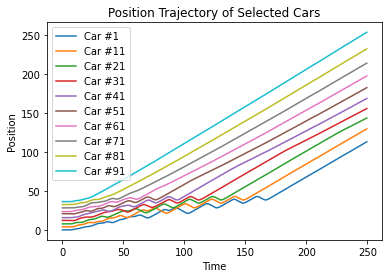

In [40]:
for i in range(n):
    if i % 10 == 0:
        plt.plot(times, tanh_sol.y[i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Trajectory of Selected Cars")
plt.show()

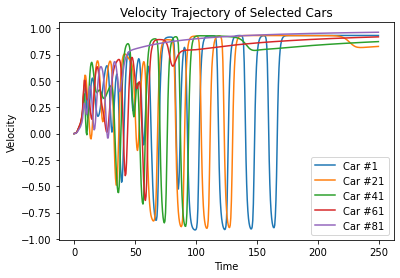

In [41]:
for i in range(n):
    if i % 20 == 0:
        plt.plot(times, tanh_sol.y[n+i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Selected Cars")
plt.show()

Scenario #3 is by far the most unstable simulation so far. This is likely due to the initial position and spacing of all of the cars, as hypothesized from Scenario #2. The position of car #1 has clear periods of acceleration and braking, indicating some randomness from car #100 propagated to the first car. However, the cars all seem to reach their max velocity near the end of the simulation, indicating some stability.

### Sigmoid velocity

In [42]:
y = initialize()

In [43]:
sigmoid_ode = ode_generator(sigmoid)
sigmoid_sol = solve_ivp(sigmoid_ode, [0, tMax], y, method="RK45", max_step=dt)

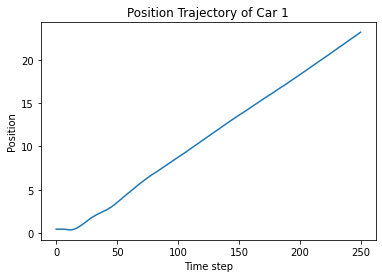

In [44]:
times = np.arange(0, tMax, dt)
plt.plot(times, sigmoid_sol.y[0, :500])
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("Position Trajectory of Car 1")
plt.show()

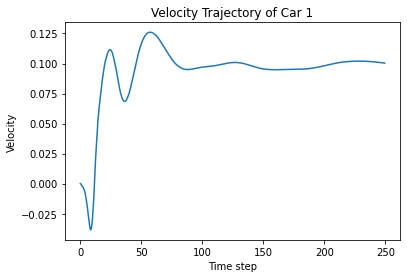

In [45]:
plt.plot(times, sigmoid_sol.y[n, :500])
plt.xlabel("Time step")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Car 1")
plt.show()

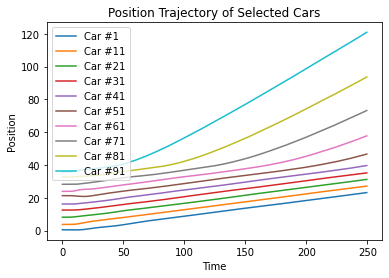

In [46]:
for i in range(n):
    if i % 10 == 0:
        plt.plot(times, sigmoid_sol.y[i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Trajectory of Selected Cars")
plt.show()

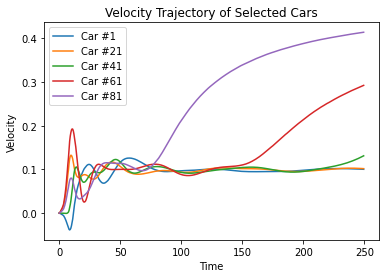

In [47]:
for i in range(n):
    if i % 20 == 0:
        plt.plot(times, sigmoid_sol.y[n+i, :500], label=f"Car #{i+1}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity Trajectory of Selected Cars")
plt.show()

Scenario #3 was stable for sigmoid velocity in contrast to tanh velocity. This can likely be attributed to the smoother shape of the sigmoid curve compared to tanh. Most of the cars seem to reaching their max velocity, but as seen in Scenario #1, the changes from car #100 take much longer to propagate to car #1.

### Generate animation

In [ ]:
# Tanh velocity function position of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario3_tanh_car1_position', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario3_tanh_car1_position.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        plt.plot(times[:i], tanh_sol.y[0, :i])
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 3] Tanh Position of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Tanh velocity function velocity of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario3_tanh_car1_velocity', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario3_tanh_car1_velocity.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        plt.plot(times[:i], tanh_sol.y[n, :i])
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.title("[Scenario 3] Tanh Velocity of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Tanh velocity function selected cars
fig = plt.figure(dpi=200)
metadata = dict(title='scenario3_tanh_cars_positions', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario3_tanh_cars_positions.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        for j in range(n):
            if j % 20 == 0:
                plt.plot(times[:i], tanh_sol.y[j, :i], label=f"Car #{j+1}")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 3] Tanh Position of Selected Cars")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function position of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario3_sigmoid_car1_position', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario3_sigmoid_car1_position.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        plt.plot(times[:i], sigmoid_sol.y[0, :i])
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 3] Sigmoid Position of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function velocity of car 1
fig = plt.figure(dpi=200)
metadata = dict(title='scenario3_sigmoid_car1_velocity', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario3_sigmoid_car1_velocity.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        plt.plot(times[:i], sigmoid_sol.y[n, :i])
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.title("[Scenario 3] Sigmoid Velocity of Car 1")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

In [ ]:
# Sigmoid velocity function selected cars
fig = plt.figure(dpi=200)
metadata = dict(title='scenario3_sigmoid_cars_positions', artist='Siddhant Sharma')
writer = FFMpegWriter(fps=10,metadata=metadata,bitrate=200000)
with writer.saving(fig, "scenario3_sigmoid_cars_positions.mp4", dpi=200):
    times = np.arange(0, tMax, dt)
    for i in range(500):
        plt.clf()
        for j in range(n):
            if j % 20 == 0:
                plt.plot(times[:i], sigmoid_sol.y[j, :i], label=f"Car #{j+1}")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.title("[Scenario 3] Sigmoid Position of Selected Cars")
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

## Conclusions  
Throughout the 3 scenarios, 2 main factors affected the stability of the system: initial density of cars and the velocity function used. The lower the initial density of cars in their initial positions, the more stable the movement and velocities of the car, especially car #1. Similarly, the smoother the velocity function, the more stable the system appeared to be. However, the smoothness came with the cost of slower propagating of changes throughout the system, which can likely be attributed to the lower magnitude of the sigmoid function. A future experiment can be to use a scaled version of sigmoid that has bounds $(-1, 1)$ instead of $(-0.5, 0.5)$.